In [1]:
import pandas as pd
import datautils
import modelutils as mu
import time
from sklearn.model_selection import ParameterGrid
import matplotlib.pyplot as plt
import numpy as np

## DATASET IMPORTING

In [2]:
DATASET = "Dataset/ML-CUP23-TR.csv"
df_cup = pd.read_csv(DATASET, skiprows=6)
df_cup.rename(columns={"# Training set: ID": "ID"}, inplace=True)

df_cup.info()

DESIGN_SIZE = 1
TRAIN_SIZE = 1

df_design, df_test = datautils.hold_out(df_cup, DESIGN_SIZE)
df_train, df_val = datautils.hold_out(df_design, TRAIN_SIZE)
X_train, y_train = datautils.obtain_features_targets(df_train)
X_val, y_val = datautils.obtain_features_targets(df_val)
X_test, y_test = datautils.obtain_features_targets(df_test)

input_size = X_train.shape[1]
output_size = y_train.shape[1]

print(df_cup.head())
print(len(df_train), len(df_val), len(df_test))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      1000 non-null   int64  
 1   x1      1000 non-null   float64
 2   x2      1000 non-null   float64
 3   x3      1000 non-null   float64
 4   x4      1000 non-null   float64
 5   x5      1000 non-null   float64
 6   x6      1000 non-null   float64
 7   x7      1000 non-null   float64
 8   x8      1000 non-null   float64
 9   x9      1000 non-null   float64
 10  x10     1000 non-null   float64
 11  y1      1000 non-null   float64
 12  y2      1000 non-null   float64
 13  y3      1000 non-null   float64
dtypes: float64(13), int64(1)
memory usage: 109.5 KB
   ID        x1        x2        x3        x4        x5        x6        x7  \
0   1 -0.917280 -0.712727 -0.989904  0.992819  0.993649  0.995543  0.711074   
1   2 -0.858784  0.998755 -0.998396  0.999909  0.316503 -0.951897 -0.163139   
2   3 -0.990

In [ ]:
RESULTS = "Results/"

results_dict = {
    "Hidden size": [],
    "Alpha": [],
    "Seed": [],
    "Initialization type": [],
    "Train": [],
    "Time": [],
    "Soldist": [],
    "Condition_Imp": [],
}



## LOSS CALCULATION

Implemented Solving

In [ ]:
RESULTS = "RESULTS/"

hyperparameters = {
            "Hidden size": range(1,500),
            "Alpha": [-2],
            "Initialization type": ["fan-in"],
            }

param_grid = list(ParameterGrid(hyperparameters))

plottrainlossch = []

plotvallossch = []
plothiddentimech = []


best_loss = float("inf")

for params in param_grid:
    meanlosstrain=0
    meanlossval=0
    meanhiddentime=0
    print(params)
    value = 10 ** params["Alpha"]

    for seed in range(1,10):
        # initialize the model
        # compute exact solution using qr which has guaranteed better numerical stability
        model_true = mu.ELM(input_size, params["Hidden size"], output_size, seed=seed)
        model_true.compute_wout_system_qr(X_train, y_train, alpha=value)

        elm = mu.ELM(
            input_size,
            params["Hidden size"],
            output_size,
            seed=seed,
            init=params["Initialization type"],
        )
        # measure the time

        cond_number_imp = np.linalg.cond(X_train.dot(elm.input_weights))

        start_time = time.process_time()

        # train with implemented method
        elm.computewoutsystem(X_train, y_train, alpha=value)

        end_time = time.process_time()

        # Training loss
        train_pred = elm.predict(x=X_train)
        loss_train = mu.compute_loss(y_train, train_pred, alpha=value)
        train_variance = mu.compute_variance(y_train, train_pred)
        meanlosstrain+=loss_train

        
        sol_dist = np.linalg.norm(elm.output_weights - model_true.output_weights, "fro")
        # save the results

        
        
        
        
        if loss_train < best_loss:
            best_loss = loss_train
            best_variance_train = train_variance
            best_params = params
            best_seed=seed
            best_model = elm
            best_alpha = value
            

        meanhiddentime+=end_time - start_time

    meanlosstrain/=9
    meanlossval/=9
    meanhiddentime/=9  

    
    # Plot the results
    plottrainlossch.append((params["Hidden size"], meanlosstrain, value))
    plotvallossch.append((params["Hidden size"], meanlossval, value))
    plothiddentimech.append((params["Hidden size"], meanhiddentime, value))
    
    

    # Save the results
    results_dict["Hidden size"].append(params["Hidden size"])
    results_dict["Alpha"].append(value)
    results_dict["Initialization type"].append(params["Initialization type"])
    results_dict["Train"].append(meanlosstrain)
    results_dict["Time"].append(meanhiddentime)
    results_dict["Seed"].append(seed)
    results_dict["Soldist"].append(sol_dist)
    results_dict["Condition_Imp"].append(cond_number_imp)
    results_dict["Condition_True"].append(cond_number_true)

results = pd.DataFrame(results_dict)
results.to_csv(RESULTS + "results_implemented.csv", index=False)


print("Best parameters:")
print(best_params)
print("Seed")
print(best_seed)
print("Best loss train:")
print(best_loss_train)
print("Best variance train:")
print(best_variance_train)
print("Best alpha:")
print(best_alpha)
print("Best model:")
print(best_model)


{'Alpha': -5, 'Hidden size': 1, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 2, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 3, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 4, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 5, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 6, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 7, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 8, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 9, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 10, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 11, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 12, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 13, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 14, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidden size': 15, 'Initialization type': 'fan-in'}
{'Alpha': -5, 'Hidd

KeyboardInterrupt: 

In [20]:
import csv

with open("resultscholtrain.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Number of Units", "Loss", "Alpha"])  # Intestazione
    writer.writerows(plottrainlossch)  # Scrive i dati riga per riga

with open("resultscholval.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Number of Units", "Loss", "Alpha"])  # Intestazione
    writer.writerows(plotvallossch)  # Scrive i dati riga per riga

with open("resultscholtime.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Number of Units", "Time", "Alpha"])  # Intestazione
    writer.writerows(plothiddentimech)  # Scrive i dati riga per riga

Np solving

In [ ]:
hyperparameters = {
            "Hidden size": range(1,500),
            "Alpha": [-2],
            "Initialization type": ["fan-in"],
            }

param_grid = list(ParameterGrid(hyperparameters))

plottrainlossch = []

plotvallossch = []
plothiddentimech = []


best_loss = float("inf")

for params in param_grid:
    meanlosstrain=0
    meanlossval=0
    meanhiddentime=0
    print(params)
    value = 10 ** params["Alpha"]

    for seed in range(1,10):
        # initialize the model
        # compute exact solution using qr which has guaranteed better numerical stability
        model_true = mu.ELM(input_size, params["Hidden size"], output_size, seed=seed)
        model_true.compute_wout_system_qr(X_train, y_train, alpha=value)

        elm = mu.ELM(
            input_size,
            params["Hidden size"],
            output_size,
            seed=seed,
            init=params["Initialization type"],
        )
        # measure the time
        
        start_time = time.process_time()

        # train with implemented method
        elm.computewoutsystem_np(X_train, y_train, alpha=value)

        end_time = time.process_time()

        # Training loss
        train_pred = elm.predict(x=X_train)
        loss_train = mu.compute_loss(y_train, train_pred, alpha=value)
        train_variance = mu.compute_variance(y_train, train_pred)
        meanlosstrain+=loss_train


        sol_dist = np.linalg.norm(elm.output_weights - model_true.output_weights, "fro")
        # save the results

        
        
        
        
        if loss_train < best_loss:
            best_loss = loss_train
            best_variance_train = train_variance
            best_params = params
            best_seed=seed
            best_model = elm
            best_alpha = value
            

        meanhiddentime+=end_time - start_time

    meanlosstrain/=9
    meanlossval/=9
    meanhiddentime/=9  

    
    # Plot the results
    plottrainlossch.append((params["Hidden size"], meanlosstrain, value))
    plotvallossch.append((params["Hidden size"], meanlossval, value))
    plothiddentimech.append((params["Hidden size"], meanhiddentime, value))
    
    

    # Save the results
    results_dict["Hidden size"].append(params["Hidden size"])
    results_dict["Alpha"].append(value)
    results_dict["Initialization type"].append(params["Initialization type"])
    results_dict["Train"].append(meanlosstrain)
    results_dict["Time"].append(meanhiddentime)
    results_dict["Seed"].append(seed)
    results_dict["Soldist"].append(sol_dist)

results = pd.DataFrame(results_dict)



        # measure the time
        
        start_time = time.process_time()

        # train with implemented method
        #elm.computewoutsystem(X_train, y_train, alpha=value)
        # train with numpy method
        elm.computewoutsystem_np(X_train, y_train, alpha=value)
        
        # Training loss
        train_pred = elm.predict(x=X_train)
        loss_train = mu.compute_loss(y_train, train_pred, alpha=value)
        train_variance = mu.compute_variance(y_train, train_pred)
        meanlosstrain+=loss_train

        # Validation loss
        val_pred = elm.predict(x=X_val)
        loss_val = mu.compute_loss(y_val, val_pred)
        val_variance = mu.compute_variance(y_val, val_pred)
        meanlossval+=loss_val

        end_time = time.process_time()

        # save the results

        
        
        
        
        if loss_val < best_loss:
            best_loss_val = loss_val
            best_loss_train = loss_train
            best_variance_train = train_variance
            best_variance_val = val_variance
            best_params = params
            best_seed=seed
            best_alpha = value
            best_model = elm
            

        meanhiddentimenp+=end_time - start_time

    meanlosstrain/=9
    meanlossval/=9
    meanhiddentimenp/=9
    print(meanlosstrain)
    print(meanlossval)  

    

    # Plot the results
    plottrainlossnp.append((params["Hidden size"], meanlosstrain, value))
    plotvallossnp.append((params["Hidden size"], meanlossval,value))
    plothiddentimenp.append((params["Hidden size"], meanhiddentimenp,value))
    
    results = pd.DataFrame(results_dict)
    results.to_csv(RESULTS + "results_systemresolution.csv", index=False)
    # Save the results
    results_dict["Hidden size"].append(params["Hidden size"])
    results_dict["Alpha"].append(value)
    results_dict["Initialization type"].append(params["Initialization type"])
    results_dict["Train"].append(meanlosstrain)
    results_dict["Validation"].append(meanlossval)
    results_dict["Time"].append(meanhiddentime)
results.to_csv(RESULTS + "results_np.csv", index=False)

print("Best parameters:")
print(best_params)
print("Seed")
print(best_seed)
print("Best loss train:")
print(best_loss_train)
print("Best variance train:")
print(best_variance_train)
print("Best loss val:")
print(best_loss_val)
print("Best variance val:")
print(best_variance_val)
print("Best alpha")
print(best_alpha)
print(plothiddentimenp)


{'Alpha': -5, 'Hidden size': 1, 'Initialization type': 'fan-in'}
1938.495650154298
2096.8271357399676
{'Alpha': -5, 'Hidden size': 2, 'Initialization type': 'fan-in'}
1270.7041436469635
1443.205240211459
{'Alpha': -5, 'Hidden size': 3, 'Initialization type': 'fan-in'}
1018.482304299718
1166.1416021568464
{'Alpha': -5, 'Hidden size': 4, 'Initialization type': 'fan-in'}
771.9680514288236
866.4516807306969
{'Alpha': -5, 'Hidden size': 5, 'Initialization type': 'fan-in'}
689.2739492401364
784.5404619952553
{'Alpha': -5, 'Hidden size': 6, 'Initialization type': 'fan-in'}
408.34663782502423
472.0625601484761
{'Alpha': -5, 'Hidden size': 7, 'Initialization type': 'fan-in'}
250.31788104132133
298.22206348736535
{'Alpha': -5, 'Hidden size': 8, 'Initialization type': 'fan-in'}
213.87292797616817
251.45566071056135
{'Alpha': -5, 'Hidden size': 9, 'Initialization type': 'fan-in'}
209.03069224688377
253.4776657324022
{'Alpha': -5, 'Hidden size': 10, 'Initialization type': 'fan-in'}
127.353669540437

In [6]:
import csv

with open("resultsnptrain.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Number of Units", "Loss", "Alpha"])  # Intestazione
    writer.writerows(plottrainlossnp)  # Scrive i dati riga per riga

with open("resultsnpval.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Number of Units", "Loss", "Alpha"])  # Intestazione
    writer.writerows(plotvallossnp)  # Scrive i dati riga per riga

with open("resultsnptime.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerow(["Number of Units", "Time", "Alpha"])  # Intestazione
    writer.writerows(plothiddentimenp)  # Scrive i dati riga per riga

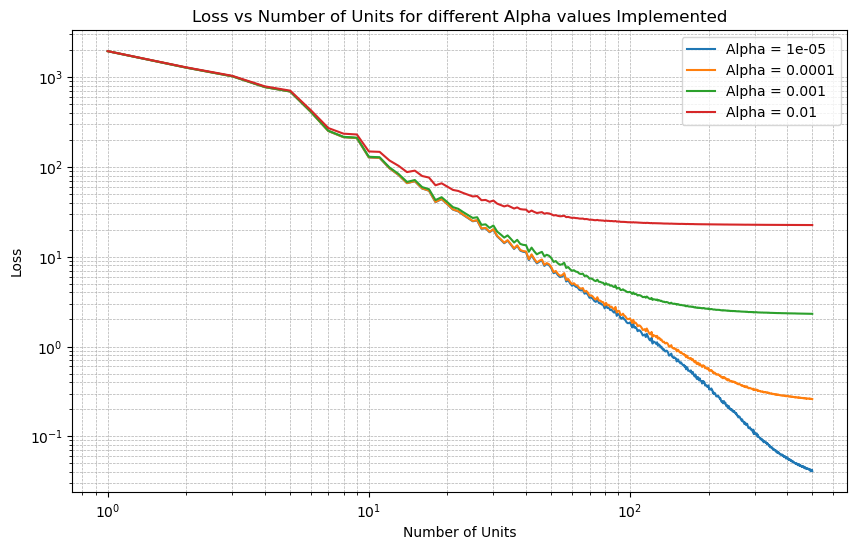

In [8]:
df = pd.read_csv("resultscholtrain.csv")

alpha_values = sorted(df["Alpha"].unique())[:4]  # Prendi i primi 5 valori unici di alpha

plt.figure(figsize=(10, 6))

# Creiamo un plot per ogni valore di alpha selezionato
for alpha in alpha_values:
    subset = df[df["Alpha"] == alpha]
    plt.plot(subset["Number of Units"], subset["Loss"], linestyle="-", label=f"Alpha = {alpha}")

# Personalizzazione del grafico
plt.xlabel("Number of Units")
plt.ylabel("Loss")
plt.xscale("log")  # Scala logaritmica per migliore visualizzazione
plt.yscale("log")
plt.legend()
plt.title("Loss vs Number of Units for different Alpha values Implemented")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

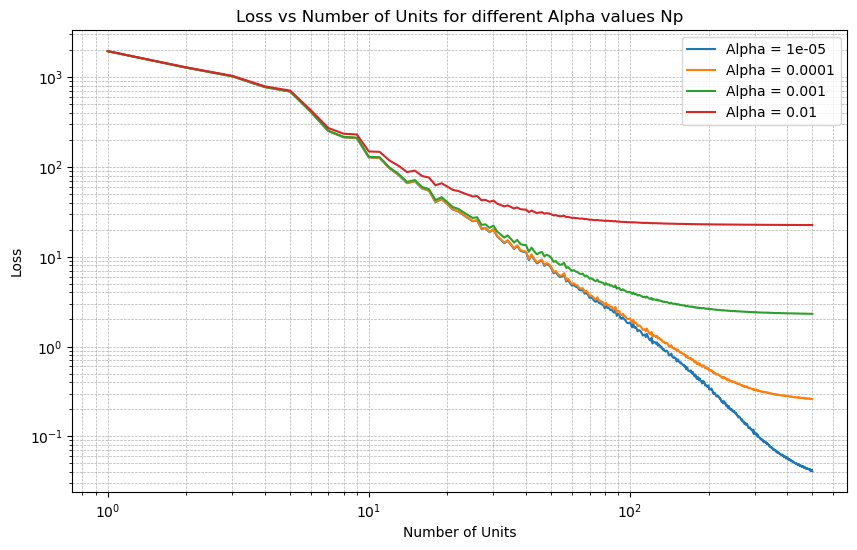

In [9]:
df = pd.read_csv("resultsnptrain.csv")

alpha_values = sorted(df["Alpha"].unique())[:4]  # Prendi i primi 5 valori unici di alpha

plt.figure(figsize=(10, 6))

# Creiamo un plot per ogni valore di alpha selezionato
for alpha in alpha_values:
    subset = df[df["Alpha"] == alpha]
    plt.plot(subset["Number of Units"], subset["Loss"], linestyle="-", label=f"Alpha = {alpha}")

# Personalizzazione del grafico
plt.xlabel("Number of Units")
plt.ylabel("Loss")
plt.xscale("log")  # Scala logaritmica per migliore visualizzazione
plt.yscale("log")
plt.legend()
plt.title("Loss vs Number of Units for different Alpha values Np")
plt.grid(True, which="both", linestyle="--", linewidth=0.5)

In [ ]:
#Now we print the difference between the two methods
plottrainlossch = np.array(plottrainlossch)
plotvallossch = np.array(plotvallossch)


"""plottrainlossnp = np.array(plottrainlossnp)
plotvallossnp = np.array(plotvallossnp)

#print the difference between the two methods with the norm
print(np.linalg.norm(plottrainlossch[:,1]-plottrainlossnp[:,1]))
print(np.linalg.norm(plotvallossch[:,1]-plotvallossnp[:,1]))"""



## Conditioning calculation

In [ ]:
plottrainalphaloss = []
plotvalalphaloss = []
plothiddentime = []


hidden= [50,100,1000,2000]
alpha= range(-10, 0)


best_loss = float("inf")
totalarray=[]
for alp in alpha:
    print("alpha")
    print(alp)
    alphaarray=[alp]

    for hid in hidden:
        print("hidden")
        print(hid)
        value = 10 ** alp
        seedmean=0
        for seed in range(1,10):
            print(seed)
            # initialize the model
            elm = mu.ELM(
                input_size,
                hid,
                output_size,
                seed=seed,
                init="fan-in",
            )

            cond=elm.condition_number_m(X_train, alpha=value) 
            print(cond)
            seedmean+=cond  

        seedmean/=9

        alphaarray.append(seedmean)

    totalarray.append(alphaarray)

print(totalarray)

Testing alpha: -10
Testing hidden units: 50
Seed: 1


AttributeError: 'ELM' object has no attribute 'fit'

## PLOTS

In [13]:
#Now we want to compute the difference between the losses of the two methods
plottrainlossch = np.array(plottrainlossch)
plotvallossch = np.array(plotvallossch)

plottrainlossnp = np.array(plottrainlossnp)
plotvallossnp = np.array(plotvallossnp)

print(np.linalg.norm(plottrainlossch[:,1]-plottrainlossnp[:,1]))
print(np.linalg.norm(plotvallossch[:,1]-plotvallossnp[:,1]))


2.0775332383975954e-12
1.0478587685429992e-11


Cholensky Loss 

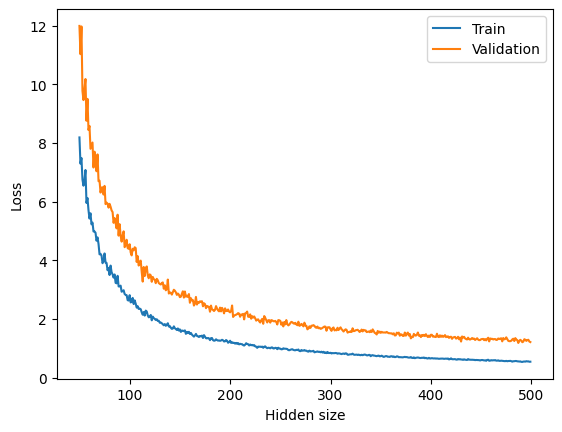

In [11]:
 
plotpointstrain = np.array(plottrainlossch)
plotpointsval = np.array(plotvallossch)


plt.plot(plotpointstrain[:, 0], plotpointstrain[:, 1], label="Train")
plt.plot(plotpointsval[:, 0], plotpointsval[:, 1], label="Validation")

plt.xlabel("Hidden size")
plt.ylabel("Loss")
plt.legend()
plt.show()




Np loss

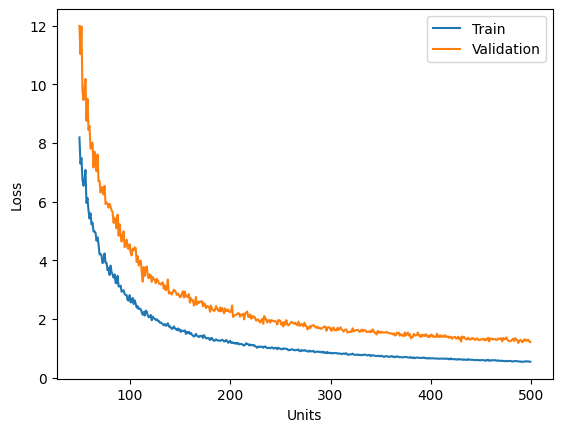

In [12]:
plottrainnp = np.array(plottrainlossnp)
plotvalnp=np.array(plotvallossnp)

plt.plot(plottrainnp[:, 0], plottrainnp[:, 1], label="Train")
plt.plot(plotvalnp[:, 0], plotvalnp[:, 1], label="Validation")

#plt.yscale("log")
plt.xlabel("Units")
plt.ylabel("Loss")
plt.legend()
plt.show()

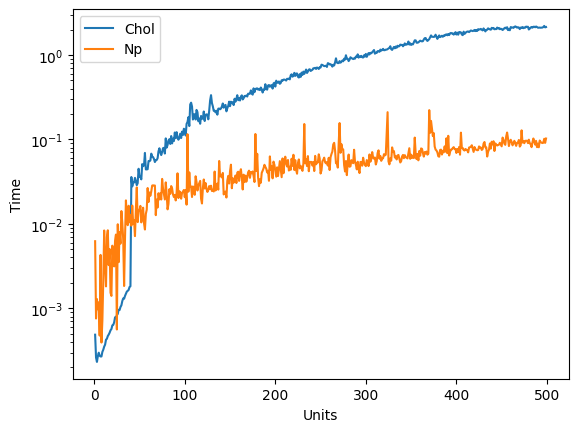

0.5518317804618242
0.0009750465331676351


In [6]:
plottime = np.array(plothiddentimech)
plottime2 = np.array(plothiddentimenp)
plt.plot(plottime[:, 0], plottime[:, 1], label="Chol")
plt.plot(plottime[:, 0],plottime2[:, 1], label="Np")

plt.yscale("log")
plt.xlabel("Units")
plt.ylabel("Time")
plt.legend()
plt.show()

print(np.var(plottime[:, 1]))
print(np.var(plottime2[:, 1]))

In [8]:
#Prendo solo gli ultimi 400 el
# ementi di ogni vettore
plottimelast = plottime[-400:]
plottime2last = plottime2[-400:]



differenzenp = np.diff(plottime2last[:, 1])
differenzechol=np.diff(plottimelast[:, 1])
print(np.var(differenzechol))
print(np.var(differenzenp))

0.0022534968326825312
0.0004823747866522072


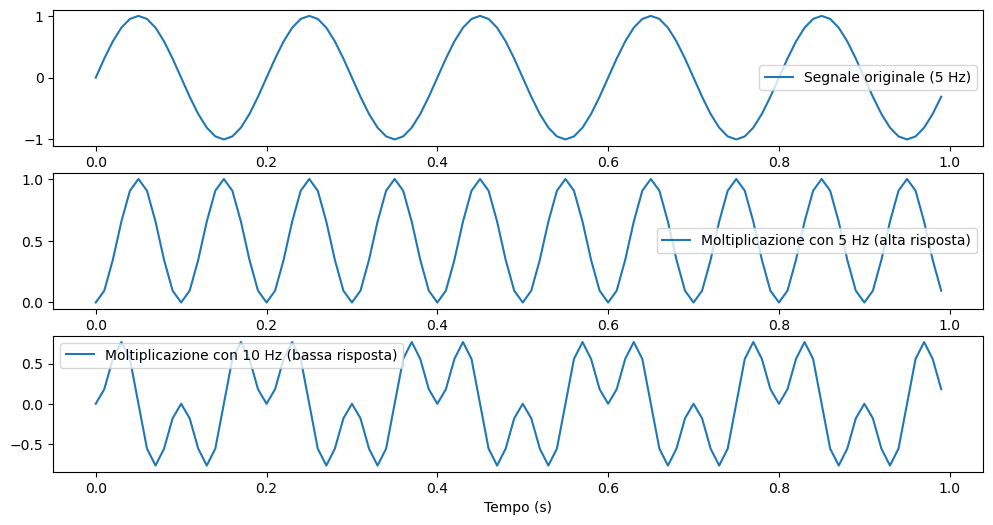

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Parametri
Fs = 100  # Frequenza di campionamento (100 Hz)
T = 1  # Durata del segnale in secondi
t = np.linspace(0, T, Fs, endpoint=False)

# Segnale a 5 Hz
signal = np.sin(2 * np.pi * 5 * t)

# Sinusoidi di test (5 Hz e 10 Hz)
sin_5hz = np.sin(2 * np.pi * 5 * t)
sin_10hz = np.sin(2 * np.pi * 10 * t)

# Moltiplicazione
result_5hz = signal * sin_5hz
result_10hz = signal * sin_10hz

# Grafico
plt.figure(figsize=(12, 6))

plt.subplot(3,1,1)
plt.plot(t, signal, label="Segnale originale (5 Hz)")
plt.legend()

plt.subplot(3,1,2)
plt.plot(t, result_5hz, label="Moltiplicazione con 5 Hz (alta risposta)")
plt.legend()

plt.subplot(3,1,3)
plt.plot(t, result_10hz, label="Moltiplicazione con 10 Hz (bassa risposta)")
plt.legend()

plt.xlabel("Tempo (s)")
plt.show()

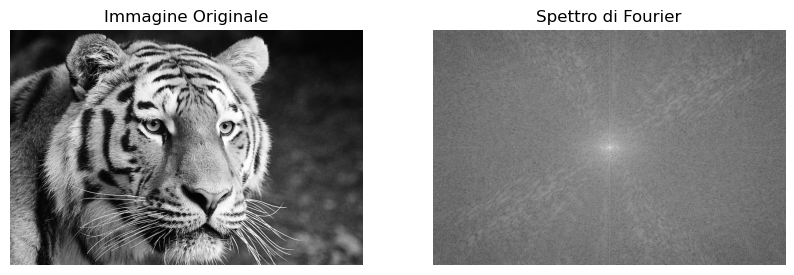

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# 1. Carica l'immagine in scala di grigi
img = cv2.imread("tiger-animals-cat-predator-preview.jpg", cv2.IMREAD_GRAYSCALE)

# 2. Applica la Trasformata di Fourier 2D
f = np.fft.fft2(img)

# 3. Sposta lo spettro per portare le basse frequenze al centro
fshift = np.fft.fftshift(f)

# 4. Calcola lo spettro in scala logaritmica per una migliore visualizzazione
magnitude_spectrum = 20 * np.log(np.abs(fshift))

# 5. Mostra l'immagine originale e lo spettro di Fourier
plt.figure(figsize=(10,5))

plt.subplot(1,2,1)
plt.imshow(img, cmap="gray")
plt.title("Immagine Originale")
plt.axis("off")

plt.subplot(1,2,2)
plt.imshow(magnitude_spectrum, cmap="gray")
plt.title("Spettro di Fourier")
plt.axis("off")

plt.show()